# Sign Language Prediction with MobileNet - Code

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Data Preparation

See the associated blog for more description regarding this.

In [ ]:
os.chdir('/content/gdrive/My Drive/Sign-Language-Digits-Dataset/Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')

os.chdir('../..')

In [ ]:
for i in range(0, 10):
    assert len(os.listdir(f'/content/gdrive/My Drive/Sign-Language-Digits-Dataset/Dataset/valid/{i}')) == 30
    assert len(os.listdir(f'/content/gdrive/My Drive/Sign-Language-Digits-Dataset/Dataset/test/{i}')) == 5

In [ ]:
train_path = '/content/gdrive/My Drive/Sign-Language-Digits-Dataset/Dataset/train'
valid_path = '/content/gdrive/My Drive/Sign-Language-Digits-Dataset/Dataset/valid'
test_path = '/content/gdrive/My Drive/Sign-Language-Digits-Dataset/Dataset/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


#Model Import, Transfer Learning and Training
Imporing Mobile Net

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
x = mobile.layers[-6].output
predictions = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs=mobile.input, outputs=predictions)

In [ ]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Training

In [ ]:
# Run for more epochs (~60) to see better results
model.fit(x=train_batches, steps_per_epoch=18, validation_data=valid_batches, validation_steps=3, epochs=30, verbose=2)

Epoch 1/30
18/18 - 31s - loss: 0.3288 - accuracy: 0.9302 - val_loss: 0.8580 - val_accuracy: 0.7000
Epoch 2/30
18/18 - 29s - loss: 0.2942 - accuracy: 0.9333 - val_loss: 0.6755 - val_accuracy: 0.7000
Epoch 3/30
18/18 - 21s - loss: 0.2280 - accuracy: 0.9477 - val_loss: 0.4676 - val_accuracy: 0.8000
Epoch 4/30
18/18 - 21s - loss: 0.2050 - accuracy: 0.9722 - val_loss: 0.4056 - val_accuracy: 0.7667
Epoch 5/30
18/18 - 19s - loss: 0.2673 - accuracy: 0.9611 - val_loss: 0.3198 - val_accuracy: 0.9667
Epoch 6/30
18/18 - 17s - loss: 0.1734 - accuracy: 0.9667 - val_loss: 0.0908 - val_accuracy: 1.0000
Epoch 7/30
18/18 - 13s - loss: 0.1649 - accuracy: 0.9500 - val_loss: 0.2169 - val_accuracy: 0.9333
Epoch 8/30
18/18 - 13s - loss: 0.1673 - accuracy: 0.9722 - val_loss: 0.1466 - val_accuracy: 0.9667
Epoch 9/30
18/18 - 9s - loss: 0.1392 - accuracy: 0.9667 - val_loss: 0.1384 - val_accuracy: 0.9333
Epoch 10/30
18/18 - 10s - loss: 0.1067 - accuracy: 0.9833 - val_loss: 0.2402 - val_accuracy: 0.9000
Epoch 11/3

#Prediction

In [ ]:
test_labels = test_batches.classes

In [ ]:
predictions = model.predict(x=test_batches, steps=5, verbose=0)

In [ ]:
print(predictions)

[[9.99907970e-01 1.81986852e-05 1.14185386e-05 8.31906982e-06
  6.76295031e-06 5.26625763e-06 1.50188625e-05 1.29211230e-06
  2.20869988e-05 3.54457507e-06]
 [9.99764740e-01 4.97330475e-05 1.24770275e-04 1.25518391e-05
  2.54034444e-06 1.78213008e-06 2.27403270e-05 5.41358190e-07
  1.18345215e-05 8.72721012e-06]
 [9.99943495e-01 1.02443319e-05 4.07669768e-06 2.59417743e-06
  2.22588847e-06 1.97174950e-06 4.29789634e-06 2.17091639e-07
  3.33743219e-06 2.75765979e-05]
 [9.97976959e-01 1.30962511e-03 4.67506397e-05 4.97402689e-05
  1.01239813e-04 3.53960495e-05 3.83031263e-04 4.16261264e-06
  1.39273197e-05 7.91871498e-05]
 [9.99794781e-01 6.55109470e-05 5.60145490e-05 9.19256217e-06
  6.74312616e-07 2.55389045e-06 1.12290845e-05 3.24747077e-07
  6.57366490e-06 5.31644619e-05]
 [5.96624841e-06 9.98959184e-01 9.82636935e-04 4.61979107e-06
  1.41901154e-07 3.83149796e-08 2.53536768e-06 1.55028567e-06
  3.95551178e-05 3.84179430e-06]
 [5.77348619e-05 9.97837484e-01 1.93230971e-03 5.29086901e

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 4 1 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


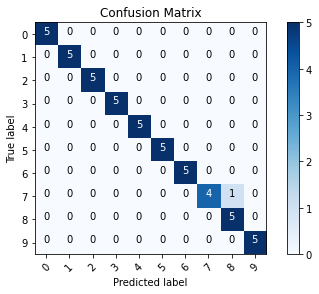

In [ ]:
# Train the model for more epochs to see better results
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')